In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load iris data into 'myiris' dataframe
myiris = pd.read_excel('Iris.xlsx') 

nrow, ncol = myiris.shape
predictors = myiris.iloc[:, :ncol - 1]
print(predictors)
target = myiris.iloc[:, -1]
print(target)

     sepal_len  sepal_wid  petal_len  petal_wid
0          5.1        3.5        1.4        0.2
1          4.9        3.0        1.4        0.2
2          4.7        3.2        1.3        0.2
3          4.6        3.1        1.5        0.2
4          5.0        3.6        1.4        0.2
..         ...        ...        ...        ...
145        6.7        3.0        5.2        2.3
146        6.3        2.5        5.0        1.9
147        6.5        3.0        5.2        2.0
148        6.2        3.4        5.4        2.3
149        5.9        3.0        5.1        1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64


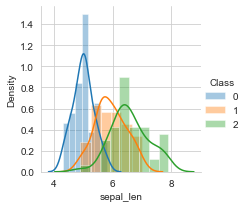

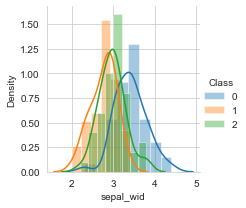

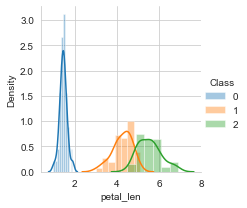

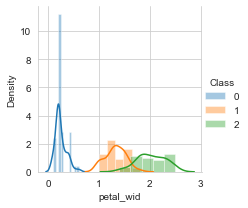

In [29]:
# Task 1 
# Use FacetGrid to show the distribution of each measurements for each class
# Learn more about FacetGrid via https://seaborn.pydata.org/tutorial/axis_grids.html

sns.FacetGrid(myiris, hue="Class", height=3).map(sns.distplot, "sepal_len").add_legend()
plt.show()
sns.FacetGrid(myiris, hue="Class", height=3).map(sns.distplot, "sepal_wid").add_legend()
plt.show()
sns.FacetGrid(myiris, hue="Class", height=3).map(sns.distplot, "petal_len").add_legend()
plt.show()
sns.FacetGrid(myiris, hue="Class", height=3).map(sns.distplot, "petal_wid").add_legend()
plt.show()

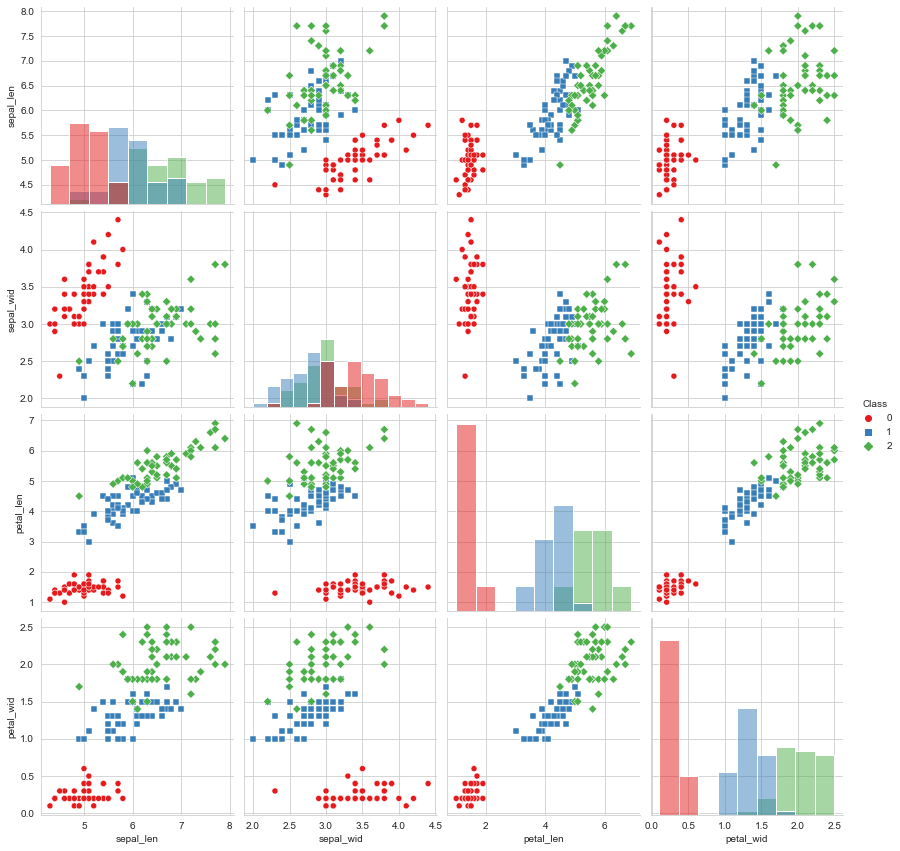

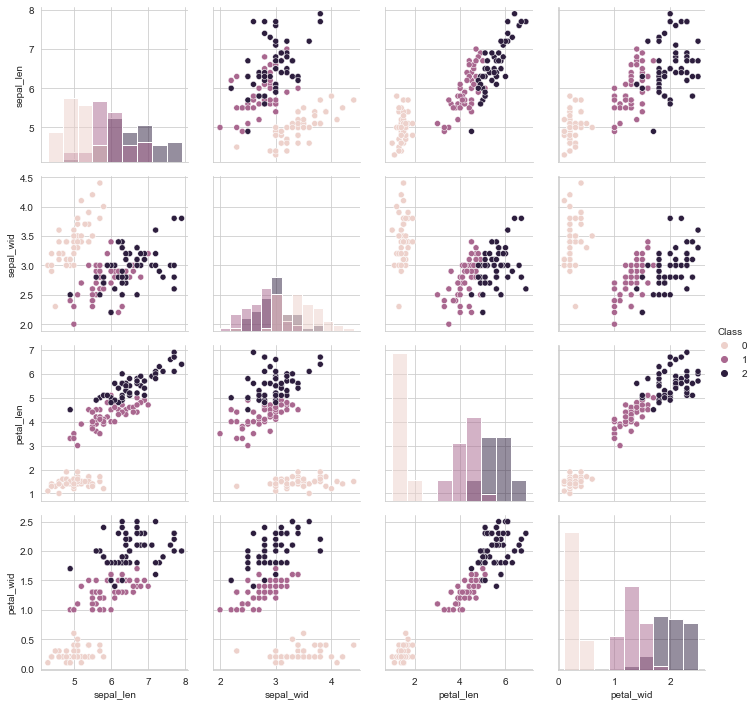

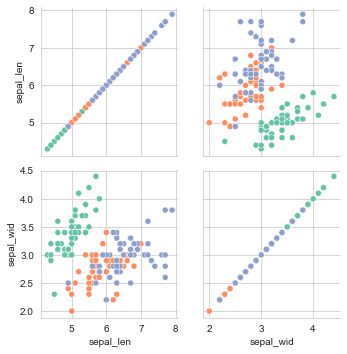

In [30]:
# Task 2 
# Use pairplot or PairGrid to show the pairwise relationship of  measurements for each class
# Learn more about FacetGrid via https://seaborn.pydata.org/tutorial/axis_grids.html

sns.set_style("whitegrid")
sns.pairplot(myiris, hue="Class", height=3, diag_kind="hist", markers=["o", "s", "D"], palette="Set1")
plt.show()


# Using PairGrid
g = sns.PairGrid(myiris, hue="Class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g = sns.PairGrid(myiris, vars=["sepal_len", "sepal_wid"], hue="Class",palette="Set2")
g.map(sns.scatterplot)

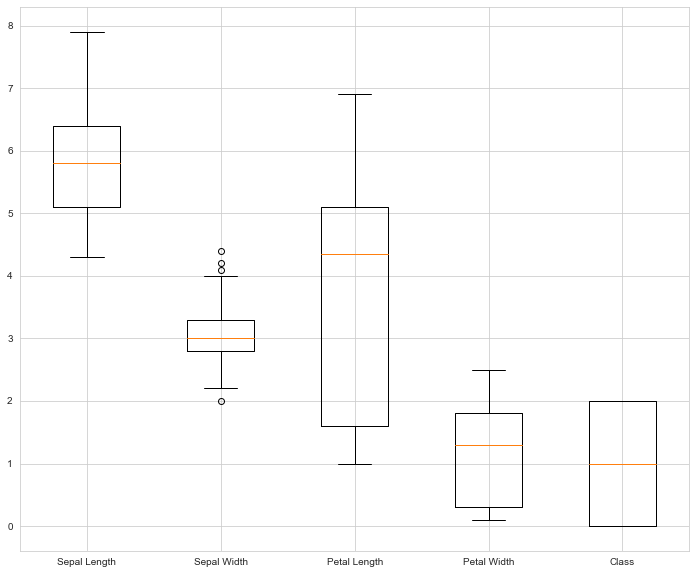

In [31]:
#More on visualisation
#boxplot
fig = plt.figure(1, figsize=(12, 10))
ax = fig.add_subplot(111)
ax.boxplot(myiris.values)
ax.set_xticklabels(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
plt.show()

In [115]:
#Task 3
'''
将数据集拆分为训练集（70%）和测试集, 测试集保存用于测试模型性能的不可见数据，而不是使用与模型训练相同的数据测试模型性能,
分层有助于解决“不平衡”数据的问题.
train_test_split（）中的“stratify”参数将确保训练集和测试集具有相同比例的类标签
'''
X_train, X_test, y_train, y_test = train_test_split(predictors, target,  test_size=.3)

print("Predictors train set")
print(X_train)
print("Predictors test set")
print(X_test)
print("target train set")
print(y_train)
print("Target test set")
print(y_test)

Predictors train set
     sepal_len  sepal_wid  petal_len  petal_wid
134        6.1        2.6        5.6        1.4
8          4.4        2.9        1.4        0.2
22         4.6        3.6        1.0        0.2
95         5.7        3.0        4.2        1.2
87         6.3        2.3        4.4        1.3
..         ...        ...        ...        ...
66         5.6        3.0        4.5        1.5
94         5.6        2.7        4.2        1.3
21         5.1        3.7        1.5        0.4
1          4.9        3.0        1.4        0.2
121        5.6        2.8        4.9        2.0

[105 rows x 4 columns]
Predictors test set
     sepal_len  sepal_wid  petal_len  petal_wid
45         4.8        3.0        1.4        0.3
54         6.5        2.8        4.6        1.5
80         5.5        2.4        3.8        1.1
124        6.7        3.3        5.7        2.1
81         5.5        2.4        3.7        1.0
40         5.0        3.5        1.3        0.3
137        6.4        3

Number of tree nodes:  19


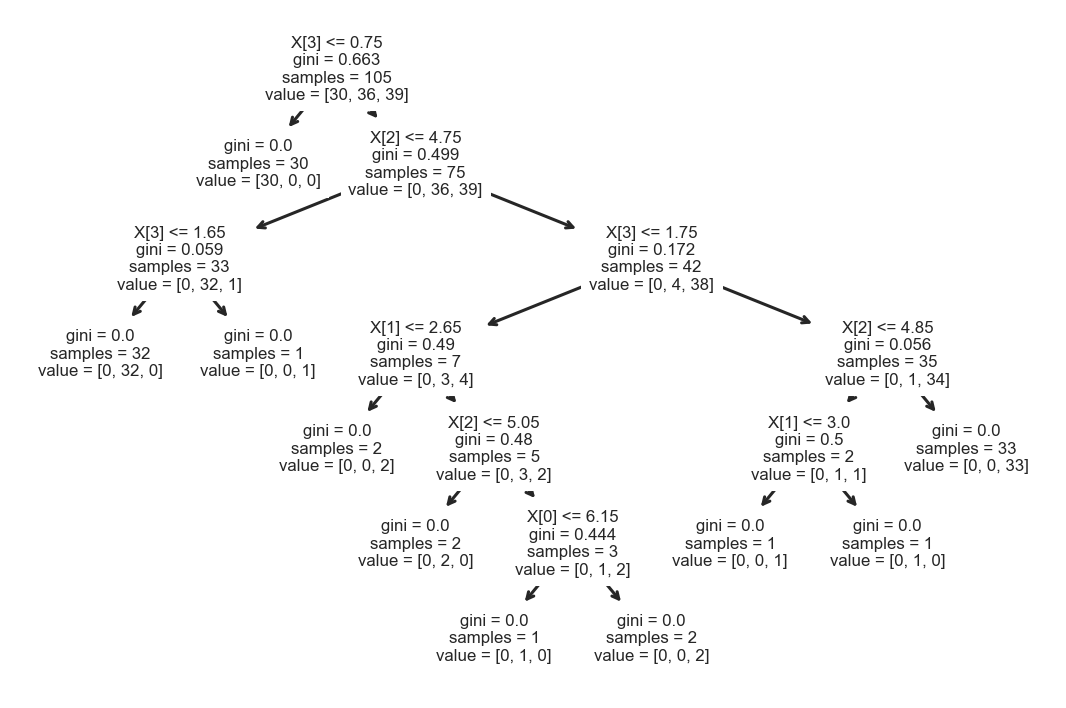

In [116]:
#Task 4.1 Build the Baseline Decision Tree 
'''
default model to check number of nodes
    -criterion{“gini”, “entropy”}, default=”gini”
    -max_depthint, default=None: The maximum depth of the tree.
     If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    -max_leaf_nodesint, default=None
     Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
     If None then unlimited number of leaf nodes.
''' 
dt = tree.DecisionTreeClassifier(random_state=47)
#Train Decision Tree Classifier
tdt=dt.fit(X_train,y_train)
print('Number of tree nodes: ', tdt.tree_.node_count) # Print out the result
#Plot Initial Decision Tree
plt.figure(dpi=220)
tree.plot_tree(tdt)
plt.show() #show the tree 

max_depth=1 Average 10-Fold CV Score:0.6666666666666667 Node count:3
max_depth=2 Average 10-Fold CV Score:0.9533333333333334 Node count:5
max_depth=3 Average 10-Fold CV Score:0.96 Node count:9
max_depth=4 Average 10-Fold CV Score:0.9533333333333334 Node count:13
max_depth=5 Average 10-Fold CV Score:0.9533333333333334 Node count:15
max_depth=6 Average 10-Fold CV Score:0.9533333333333334 Node count:15
max_depth=7 Average 10-Fold CV Score:0.9533333333333334 Node count:15
max_depth=8 Average 10-Fold CV Score:0.9533333333333334 Node count:15
max_depth=9 Average 10-Fold CV Score:0.9533333333333334 Node count:15


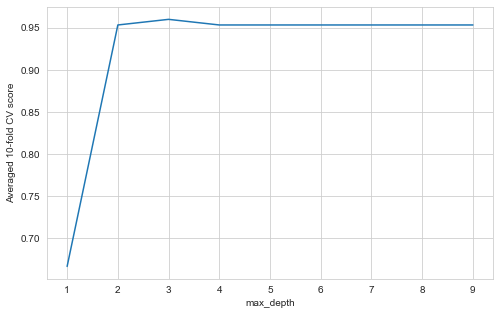

In [109]:
# Task 4.2 Tune the max_depth parameter
#10 fold cross-validation score:
cv= cross_val_score(dt,predictors,target,cv=10)

#Tune 'max_depth' parameter.
maxdepth_cv=[]
node_counts=[]
for k in range(1,10,1):
    dt=DecisionTreeClassifier(max_depth=k,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)     
#Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(1,10,1))
k=range(1,10,1)
plt.plot(k,maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

Number of tree nodes after optimizing max depth:  9


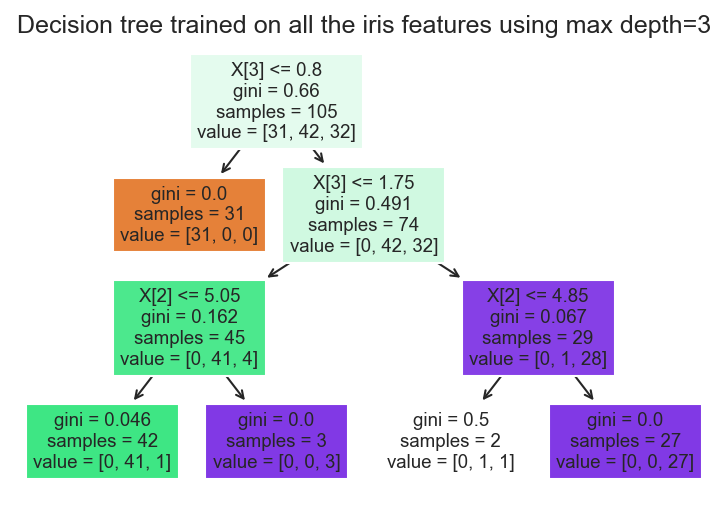

Accuracy score of our model with Decision Tree: 0.93
Precision score of our model with Decision Tree : 0.93
Recall score of our model with Decision Tree : 0.93


In [110]:
#Task 5
dt_opt=DecisionTreeClassifier(max_depth=3,random_state=47)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(dpi=150)
tree.plot_tree(dt_opt,filled=True)
plt.title("Decision tree trained on all the iris features using max depth=3")
plt.show() #show the tree


acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)

In [111]:
#Task 6
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(dt_opt.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances

,Feature,Importance
3,petal_wid,0.906
2,petal_len,0.094
0,sepal_len,0.000
1,sepal_wid,0.000


Number of tree nodes:  9


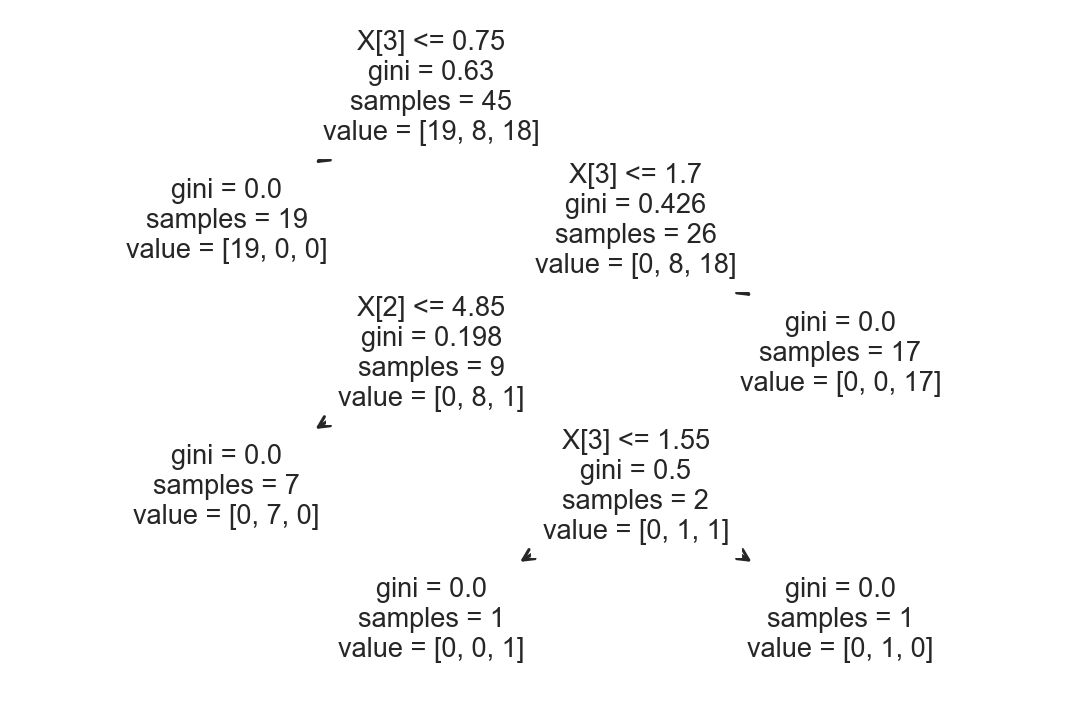

In [112]:
dtTest = tree.DecisionTreeClassifier(random_state=47)
#Train Decision Tree Classifier
TestDt=dtTest.fit(X_test,y_test)
print('Number of tree nodes: ', TestDt.tree_.node_count) # Print out the result
#Plot Initial Decision Tree
plt.figure(dpi=220)
tree.plot_tree(TestDt)
plt.show() #show the tree 

max_leaf_nodes=2 Average 10-Fold CV Score:0.6666666666666667 Node count:3
max_leaf_nodes=4 Average 10-Fold CV Score:0.9666666666666666 Node count:7
max_leaf_nodes=6 Average 10-Fold CV Score:0.96 Node count:9
max_leaf_nodes=8 Average 10-Fold CV Score:0.9533333333333334 Node count:9


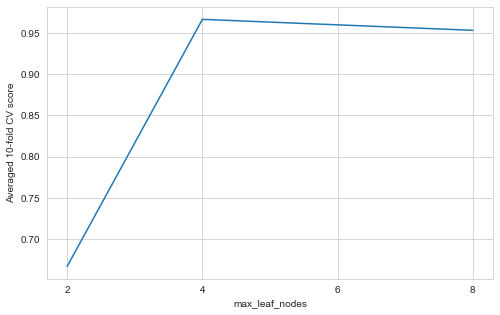

In [113]:
cv= cross_val_score(TestDt,predictors,target,cv=10)

#Tune 'max_depth' parameter.
max_leaf_nodes_cv=[]
node_counts=[]
for k in range(2,10,2):
    TestDt=DecisionTreeClassifier(max_leaf_nodes=k,random_state=47)
    TestDt.fit(X_test,y_test)
    predict=TestDt.predict(X_test)
    cv= cross_val_score(TestDt,predictors,target,cv=10)
    nodecount = TestDt.tree_.node_count
    print("max_leaf_nodes={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    max_leaf_nodes_cv.append(np.mean(cv))
    node_counts.append(nodecount)     
#Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(2,10,2))
k=range(2,10,2)
plt.plot(k,max_leaf_nodes_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

Number of tree nodes after optimizing max leaf_nodes:  7


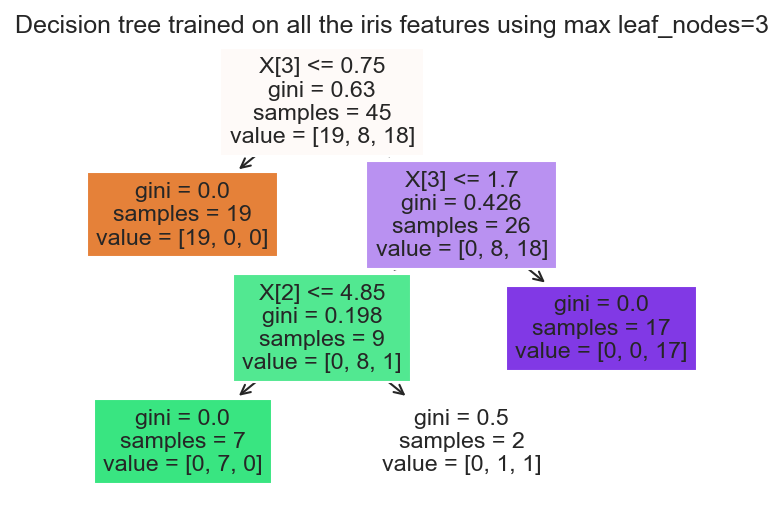

Accuracy score of our model with Decision Tree: 0.98
Precision score of our model with Decision Tree : 0.98
Recall score of our model with Decision Tree : 0.98


In [114]:
dt_opt2=DecisionTreeClassifier(max_leaf_nodes=4,random_state=47)
dt_opt_fit2=dt_opt2.fit(X_test,y_test)
predict_opt2=dt_opt2.predict(X_test)
print('Number of tree nodes after optimizing max leaf_nodes: ', dt_opt_fit2.tree_.node_count) # Print out the result
plt.figure(dpi=150)
tree.plot_tree(dt_opt2,filled=True)
plt.title("Decision tree trained on all the iris features using max leaf_nodes=3")
plt.show()

acc_score=accuracy_score(y_test, predict_opt2)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt2, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt2, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)